In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
dados = pd.DataFrame({
    'Substância':["alcool", "gasolina", "leite", "querosene", "oleo", "vinho"],
    'Concentração (%)' :[12.5, 0.1, 4.0, 1.2, 0.5, 15.0],
    'Teor Alcoólico (%)':[50, 0.05, 0.01, 0.02, 0.01, 12.5],
    
})

In [9]:
dados.head(6)

,Substância,Concentração (%),Teor Alcoólico (%)
0,alcool,12.5,50.00
1,gasolina,0.1,0.05
2,leite,4.0,0.01
3,querosene,1.2,0.02
4,oleo,0.5,0.01
5,vinho,15.0,12.50


In [7]:
dados

,Substância,Concentração (%),Teor Alcoólico (%)
0,alcool,12.5,50.00
1,gasolina,0.1,0.05
2,leite,4.0,0.01
3,querosene,1.2,0.02
4,oleo,0.5,0.01
5,vinho,15.0,12.50


In [11]:
dados = pd.get_dummies(dados, columns=['Substância'])

In [16]:
dados

,Concentração (%),Teor Alcoólico (%),Substância_alcool,Substância_gasolina,Substância_leite,Substância_oleo,Substância_querosene,Substância_vinho
0,12.5,50.00,True,False,False,False,False,False
1,0.1,0.05,False,True,False,False,False,False
2,4.0,0.01,False,False,True,False,False,False
3,1.2,0.02,False,False,False,False,True,False
4,0.5,0.01,False,False,False,True,False,False
5,15.0,12.50,False,False,False,False,False,True


In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
sse = kmeans.inertia_
print('SSE: ',sse)

SSE:  12.291075000000001


In [14]:
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Teor Alcoólico')

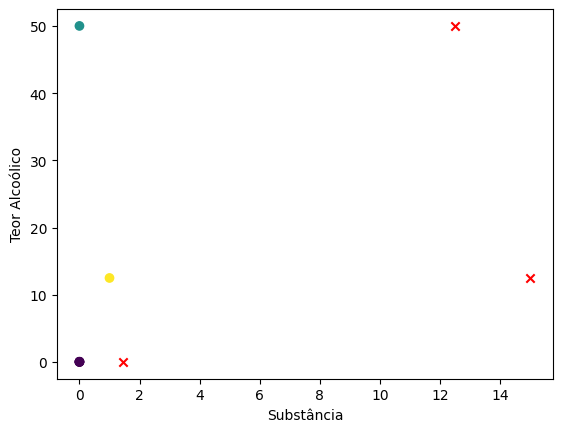

In [18]:
plt.scatter(dados['Substância_vinho'],dados['Teor Alcoólico (%)'], c= labels) 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')

plt.xlabel("Substância")
plt.ylabel("Teor Alcoólico")

In [19]:
print(labels)
print(centroids)

[1 0 0 0 0 2]
[[1.45e+00 2.25e-02 0.00e+00 2.50e-01 2.50e-01 2.50e-01 2.50e-01 0.00e+00]
 [1.25e+01 5.00e+01 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.50e+01 1.25e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00]]


In [20]:
print(dados)

   Concentração (%)  Teor Alcoólico (%)  Substância_alcool  \
0              12.5               50.00               True   
1               0.1                0.05              False   
2               4.0                0.01              False   
3               1.2                0.02              False   
4               0.5                0.01              False   
5              15.0               12.50              False   

   Substância_gasolina  Substância_leite  Substância_oleo  \
0                False             False            False   
1                 True             False            False   
2                False              True            False   
3                False             False            False   
4                False             False             True   
5                False             False            False   

   Substância_querosene  Substância_vinho  
0                 False             False  
1                 False             False  
2    

In [21]:
dados

,Concentração (%),Teor Alcoólico (%),Substância_alcool,Substância_gasolina,Substância_leite,Substância_oleo,Substância_querosene,Substância_vinho
0,12.5,50.00,True,False,False,False,False,False
1,0.1,0.05,False,True,False,False,False,False
2,4.0,0.01,False,False,True,False,False,False
3,1.2,0.02,False,False,False,False,True,False
4,0.5,0.01,False,False,False,True,False,False
5,15.0,12.50,False,False,False,False,False,True


In [22]:
dados['Grupo'] = labels
grouped_data = dados.groupby('Grupo').mean()
print(grouped_data)

       Concentração (%)  Teor Alcoólico (%)  Substância_alcool  \
Grupo                                                            
0                  1.45              0.0225                0.0   
1                 12.50             50.0000                1.0   
2                 15.00             12.5000                0.0   

       Substância_gasolina  Substância_leite  Substância_oleo  \
Grupo                                                           
0                     0.25              0.25             0.25   
1                     0.00              0.00             0.00   
2                     0.00              0.00             0.00   

       Substância_querosene  Substância_vinho  
Grupo                                          
0                      0.25               0.0  
1                      0.00               0.0  
2                      0.00               1.0  
